<a href="https://colab.research.google.com/github/ilhmahmd/UAS/blob/main/percobaanpaperfinal_2006118_2006038.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from google.colab.patches import cv2_imshow

Gambar

load citra

In [ ]:
img = cv.imread(r'/content/drive/MyDrive/DP/test images/AB5592EG.jpg')

Resize Gambar

In [ ]:
img = cv.resize(img, (int(img.shape[1]*.4),int(img.shape[0]*.4)))
cv2_imshow(img)

Konversi dari BGR ke grayscale

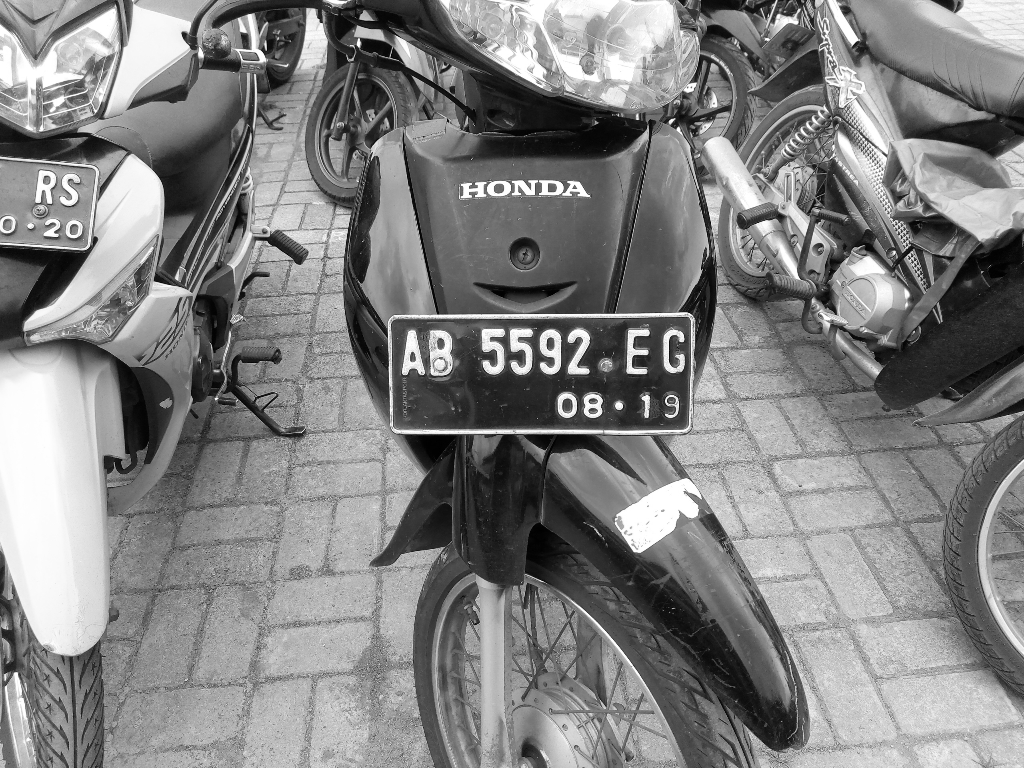

In [ ]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

Membuat Kernel

In [ ]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(20,20))

Normalisasi Cahaya (1)
lakukan operasi opening ke citra grayscale dengan kernel yang sudah dibuat (var: kernel)

In [ ]:
img_opening = cv.morphologyEx(img_gray, cv.MORPH_OPEN, kernel)

Normalisasi cahaya (2)
lakukan pengurangan citra grayscale dengan citra hasil opening

In [ ]:
img_norm = img_gray - img_opening

Normalisasi cahaya (3)
konversi citra hasil normalisasi ke citra BW (hitam putih)

In [ ]:
(thresh, img_norm_bw) = cv.threshold(img_norm, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

NORMALISASI

Gambar bw tanpa normalisasi

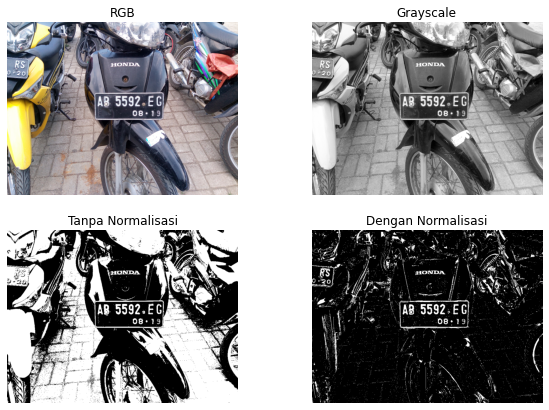

In [ ]:
(thresh, img_without_norm_bw) = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

fig = plt.figure(figsize=(10, 7)) 
row_fig = 2
column_fig = 2

fig.add_subplot(row_fig, column_fig, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("RGB")

fig.add_subplot(row_fig, column_fig, 2)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title("Grayscale")

fig.add_subplot(row_fig, column_fig, 3)
plt.imshow(img_without_norm_bw, cmap='gray')
plt.axis('off')
plt.title("Tanpa Normalisasi")

fig.add_subplot(row_fig, column_fig, 4)
plt.imshow(img_norm_bw, cmap='gray')
plt.axis('off')
plt.title("Dengan Normalisasi")

plt.show()

Cek Normalisasi selesai

DETEKSI PLAT

Contours dari gambar kendaraan

In [ ]:
contours_vehicle, hierarchy = cv.findContours(img_norm_bw, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(len(contours_vehicle))

8417


index contour yang berisi kandidat plat nomor

In [ ]:
index_plate_candidate = []

index counter dari setiap contour di contours_vehichle

In [ ]:
index_counter_contour_vehicle = 0

In [ ]:
# filter setiap contour untuk mendapatkan kandidat plat nomor
for contour_vehicle in contours_vehicle:
    
    # dapatkan posisi x, y, nilai width, height, dari contour
    x,y,w,h = cv.boundingRect(contour_vehicle)

    # dapatkan nilai aspect rationya
    aspect_ratio = w/h

    # dapatkan kandidat plat nomornya apabila:
    # 1. lebar piksel lebih dari atau sama dengan 200 piksel
    # 2. aspect rationya kurang dari atau sama dengan 4
    if w >= 200 and aspect_ratio <= 4 : 
        
        # dapatkan index kandidat plat nomornya
        index_plate_candidate.append(index_counter_contour_vehicle)
    
    # increment index counter dari contour
    index_counter_contour_vehicle += 1

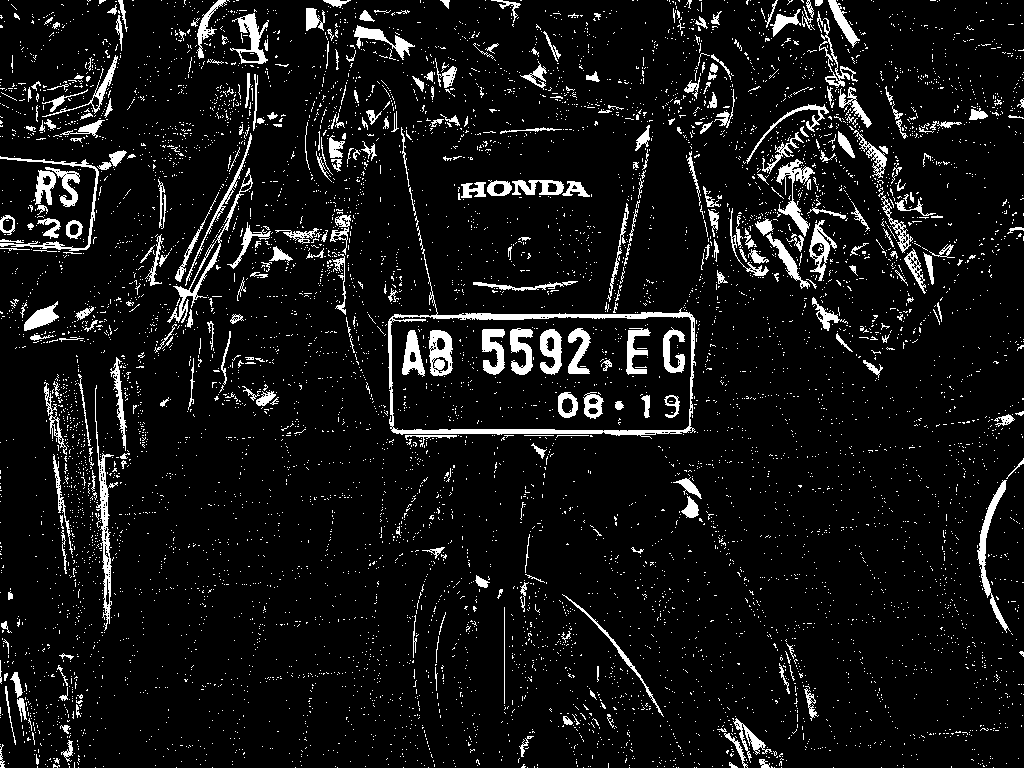

Dapat dua lokasi plat, pilih lokasi plat kedua


In [ ]:
# buat duplikat citra RGB dan BW kendaraan untuk menampilkan lokasi plat
img_show_plate = img.copy() 
img_show_plate_bw = cv.cvtColor(img_norm_bw, cv.COLOR_GRAY2RGB)
cv2_imshow(img_show_plate_bw)

if len(index_plate_candidate) == 0:

    # tampilkan peringatan plat nomor tidak terdeteksi
    print("Plat nomor tidak ditemukan")

# jika jumlah kandidat plat sama dengan 1
elif len(index_plate_candidate) == 1:

    # dapatkan lokasi untuk pemotongan citra plat
    x_plate,y_plate,w_plate,h_plate = cv.boundingRect(contours_vehicle[index_plate_candidate[0]])
    
    # gambar kotak lokasi plat nomor di citra RGB
    cv.rectangle(img_show_plate,(x_plate,y_plate),(x_plate+w_plate,y_plate+h_plate),(0,255,0),5)

    # gambar kotak lokasi plat nomor di citra BW
    cv.rectangle(img_show_plate_bw,(x_plate,y_plate),(x_plate+w_plate,y_plate+h_plate),(0,255,0),5)

    # crop citra plat 
    img_plate_gray = img_gray[y_plate:y_plate+h_plate, x_plate:x_plate+w_plate]
else:
    print('Dapat dua lokasi plat, pilih lokasi plat kedua')

    # dapatkan lokasi untuk pemotongan citra plat
    x_plate,y_plate,w_plate,h_plate = cv.boundingRect(contours_vehicle[index_plate_candidate[1]])

    # gambar kotak lokasi plat nomor di citra RGB
    cv.rectangle(img_show_plate,(x_plate,y_plate),(x_plate+w_plate,y_plate+h_plate),(0,255,0),5)

    # gambar kotak lokasi plat nomor di citra BW
    cv.rectangle(img_show_plate_bw,(x_plate,y_plate),(x_plate+w_plate,y_plate+h_plate),(0,255,0),5)

    img_plate_gray = img_gray[y_plate:y_plate+h_plate, x_plate:x_plate+w_plate]

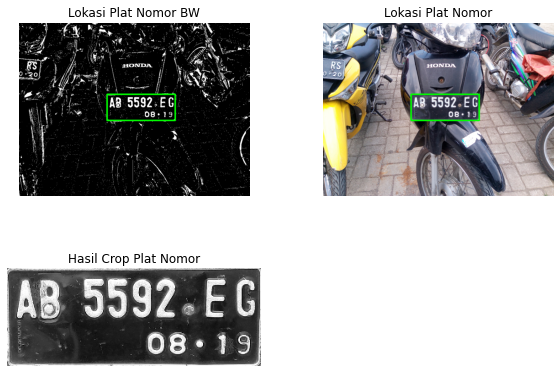

In [ ]:
# ==== Cek Deteksi Plat START ====

fig2 = plt.figure(figsize=(10, 7)) 
row_fig = 2
column_fig = 2

fig2.add_subplot(row_fig, column_fig, 1)
plt.imshow(cv.cvtColor(img_show_plate_bw, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Lokasi Plat Nomor BW")

fig2.add_subplot(row_fig, column_fig, 2)
plt.imshow(cv.cvtColor(img_show_plate, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Lokasi Plat Nomor")

fig2.add_subplot(row_fig, column_fig, 3)
plt.imshow(img_plate_gray, cmap="gray")
plt.axis('off')
plt.title("Hasil Crop Plat Nomor")

plt.show()

SEGMENTASI KARAKTER

[7. 7. 7. 7. 7. 7. 7. 7.]


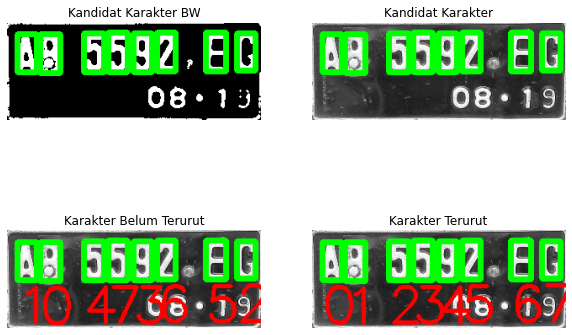

In [ ]:
# karakter yang akan disegmentasi adalah baris pertama yang berisi nilai unik setiap kendaraan

# konversi dari grayscale ke BW
(thresh, img_plate_bw) = cv.threshold(img_plate_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# hasil dari konversi BW tidak terlalu mulus, 
# ada bagian-bagian kecil yang tidak diinginkan yang mungkin bisa mengganggu
# maka hilangkan area yang tidak diinginkan dengan operasi opening

# buat kernel dengan bentuk cross dan ukuran 3x3
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))

# cv.imshow("sebelum open", img_plate_bw)

# lakukan operasi opening dengan kernel di atas
img_plate_bw = cv.morphologyEx(img_plate_bw, cv.MORPH_OPEN, kernel) # apply morph open

# cv.imshow("sesudah open", img_plate_bw)

# Segmentasi karakter menggunakan contours
# dapatkan kontur dari plat nomor
contours_plate, hierarchy = cv.findContours(img_plate_bw, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) 

# index contour yang berisi kandidat karakter
index_chars_candidate = [] #index

# index counter dari setiap contour di contours_plate
index_counter_contour_plate = 0 #idx

# duplikat dan ubah citra plat dari gray dan bw ke rgb untuk menampilkan kotak karakter
img_plate_rgb = cv.cvtColor(img_plate_gray,cv.COLOR_GRAY2BGR)
img_plate_bw_rgb = cv.cvtColor(img_plate_bw, cv.COLOR_GRAY2RGB)

# Mencari kandidat karakter
for contour_plate in contours_plate:

    # dapatkan lokasi x, y, nilai width, height dari setiap kontur plat
    x_char,y_char,w_char,h_char = cv.boundingRect(contour_plate)
    
    # Dapatkan kandidat karakter jika:
    #   tinggi kontur dalam rentang 40 - 60 piksel
    #   dan lebarnya lebih dari atau sama dengan 10 piksel 
    if h_char >= 40 and h_char <= 60 and w_char >=10:

        # dapatkan index kandidat karakternya
        index_chars_candidate.append(index_counter_contour_plate)

        # gambar kotak untuk menandai kandidat karakter
        cv.rectangle(img_plate_rgb,(x_char,y_char),(x_char+w_char,y_char+h_char),(0,255,0),5)
        cv.rectangle(img_plate_bw_rgb,(x_char,y_char),(x_char+w_char,y_char+h_char),(0,255,0),5)

    index_counter_contour_plate += 1

# tampilkan kandidat karakter
# cv.imshow('Kandidat Karakter',img_plate_rgb)

if index_chars_candidate == []:

    # tampilkan peringatan apabila tidak ada kandidat karakter
    print('Karakter tidak tersegmentasi')
else:

    # Mendapatkan yang benar-benar karakter
    #   terkadang area lain yang bukan karakter ikut terpilih menjadi kandidat karakter
    #   untuk menghilangkannya bisa dicek apakah sebaris dengan karakter plat nomor atau tidak
    #
    # Caranya dengan Scoring:
    #   Bagian karakter plat nomor akan selalu sebaris, 
    #       memiliki nilai y yang hampir sama atau tidak terlalu besar perbedaannya.
    #       Maka bandingkan nilai y dari setiap kandidat satu dengan kandidat lainnya. 
    #   Jika perbedaannya tidak lebih dari 11 piksel maka tambahkan score 1 point ke kandidat tersebut.
    #       Kandidat yang benar-benar sebuah karakter akan memiliki nilai score yang sama dan tertinggi

    # Scoring

    # untuk menyimpan skor setiap karakter pada kandidat
    score_chars_candidate = np.zeros(len(index_chars_candidate))

    # untuk counter index karakter
    counter_index_chars_candidate = 0

    # bandingkan lokasi y setiap kandidat satu dengan kandidat lainnya
    for chars_candidateA in index_chars_candidate:
        
        # dapatkan nilai y dari kandidat A
        xA,yA,wA,hA = cv.boundingRect(contours_plate[chars_candidateA])
        for chars_candidateB in index_chars_candidate:

            # jika kandidat yang dibandikan sama maka lewati
            if chars_candidateA == chars_candidateB:
                continue
            else:
                # dapatkan nilai y dari kandidat B
                xB,yB,wB,hB = cv.boundingRect(contours_plate[chars_candidateB])

                # cari selisih nilai y kandidat A dan kandidat B
                y_difference = abs(yA - yB)

                # jika perbedaannya kurang dari 11 piksel
                if y_difference < 11:
                    
                    # tambahkan nilai score pada kandidat tersebut
                    score_chars_candidate[counter_index_chars_candidate] = score_chars_candidate[counter_index_chars_candidate] + 1 

        # lanjut ke kandidat lain
        counter_index_chars_candidate += 1

    print(score_chars_candidate)

    # untuk menyimpan karakter
    index_chars = []

    # counter karakter
    chars_counter = 0

    # dapatkan karakter, yaitu yang memiliki score tertinggi
    for score in score_chars_candidate:
        if score == max(score_chars_candidate):

            # simpan yang benar-benar karakter
            index_chars.append(index_chars_candidate[chars_counter])
        chars_counter += 1

    # Sampai disini sudah didapatkan karakternya
    #   sayangnya karena ini menggunakan contours, 
    #   urutan karakter masih berdasarkan letak sumbu y, dari atas ke bawah,
    #   misal yang harusnya Z 1234 AB hasilnya malah 1 3Z24 BA.
    #   Hal ini akan menjadi masalah ketika nanti proses klasifikasi karakter.
    #   Maka mari disusun berdasarkan sumbu x, dari kiri ke kanan.

    # duplikat dan ubah ke rgb untuk menampilkan urutan karakter yang belum terurut
    img_plate_rgb2 = cv.cvtColor(img_plate_gray, cv.COLOR_GRAY2BGR)

    # tampilkan urutan karakter yang belum terurut
    for char in index_chars:
        x, y, w, h = cv.boundingRect(contours_plate[char])
        cv.rectangle(img_plate_rgb2,(x,y),(x+w,y+h),(0,255,0),5)
        cv.putText(img_plate_rgb2, str(index_chars.index(char)),(x, y + h + 50), cv.FONT_ITALIC, 2.0, (0,0,255), 3)
    
    # tampilkan karakter yang belum terurut
    # cv.imshow('Karakter Belum Terurut', img_plate_rgb2)

    # Mulai mengurutkan

    # untuk menyimpan koordinat x setiap karakter
    x_coors = []

    for char in index_chars:
        # dapatkan nilai x
        x, y, w, h = cv.boundingRect(contours_plate[char])

        # dapatkan nilai sumbu x
        x_coors.append(x)

    # urutkan sumbu x dari terkecil ke terbesar
    x_coors = sorted(x_coors)

    # untuk menyimpan karakter
    index_chars_sorted = []

    # urutkan karakternya berdasarkan koordinat x yang sudah diurutkan
    for x_coor in x_coors:
        for char in index_chars:

            # dapatkan nilai koordinat x karakter
            x, y, w, h = cv.boundingRect(contours_plate[char])

            # jika koordinat x terurut sama dengan koordinat x pada karakter
            if x_coors[x_coors.index(x_coor)] == x:

                # masukkan karakternya ke var baru agar mengurut dari kiri ke kanan
                index_chars_sorted.append(char)

    # duplikat dan ubah ke rgb untuk menampilkan yang benar-benar karakter
    img_plate_rgb3 = cv.cvtColor(img_plate_gray, cv.COLOR_GRAY2BGR)

    # Gambar kotak untuk menandai karakter yang terurut dan tambahkan teks urutannya
    for char_sorted in index_chars_sorted:

        # dapatkan nilai x, y, w, h dari karakter terurut
        x,y,w,h = cv.boundingRect(contours_plate[char_sorted])

        # gambar kotak yang menandai karakter terurut
        cv.rectangle(img_plate_rgb3,(x,y),(x+w,y+h),(0,255,0),5)

        # tambahkan teks urutan karakternya
        cv.putText(img_plate_rgb3, str(index_chars_sorted.index(char_sorted)),(x, y + h + 50), cv.FONT_ITALIC, 2.0, (0,0,255), 3)
    
    # tampilkan hasil pengurutan
    # cv.imshow('Karakter Terurut', img_plate_rgb3)

    # ==== Cek Segmentasi Karakter START ====
    # Bisa di comment/uncomment

    fig3 = plt.figure(figsize=(10, 7)) 
    row_fig = 2
    column_fig = 2

    fig3.add_subplot(row_fig, column_fig, 1)
    plt.imshow(img_plate_bw_rgb)
    plt.axis('off')
    plt.title("Kandidat Karakter BW")

    fig3.add_subplot(row_fig, column_fig, 2)
    plt.imshow(cv.cvtColor(img_plate_rgb, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Kandidat Karakter")

    fig3.add_subplot(row_fig, column_fig, 3)
    plt.imshow(cv.cvtColor(img_plate_rgb2, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Karakter Belum Terurut")

    fig3.add_subplot(row_fig, column_fig, 4)
    plt.imshow(cv.cvtColor(img_plate_rgb3, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Karakter Terurut")

    plt.show()

KLASIFIKASI KARAKTER

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from google.colab.patches import cv2_imshow


In [ ]:
data_dir = r'/content/drive/MyDrive/DP/dataset' # training dataset folder

batch_size = 32
img_height = 40
img_width = 40

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

num_classes = 36

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

model.save('my_model') # Save trained model

Found 380 files belonging to 36 classes.
Using 304 files for training.
Found 380 files belonging to 36 classes.
Using 76 files for validation.


1/1 [==============================] - 0s 21ms/step
G

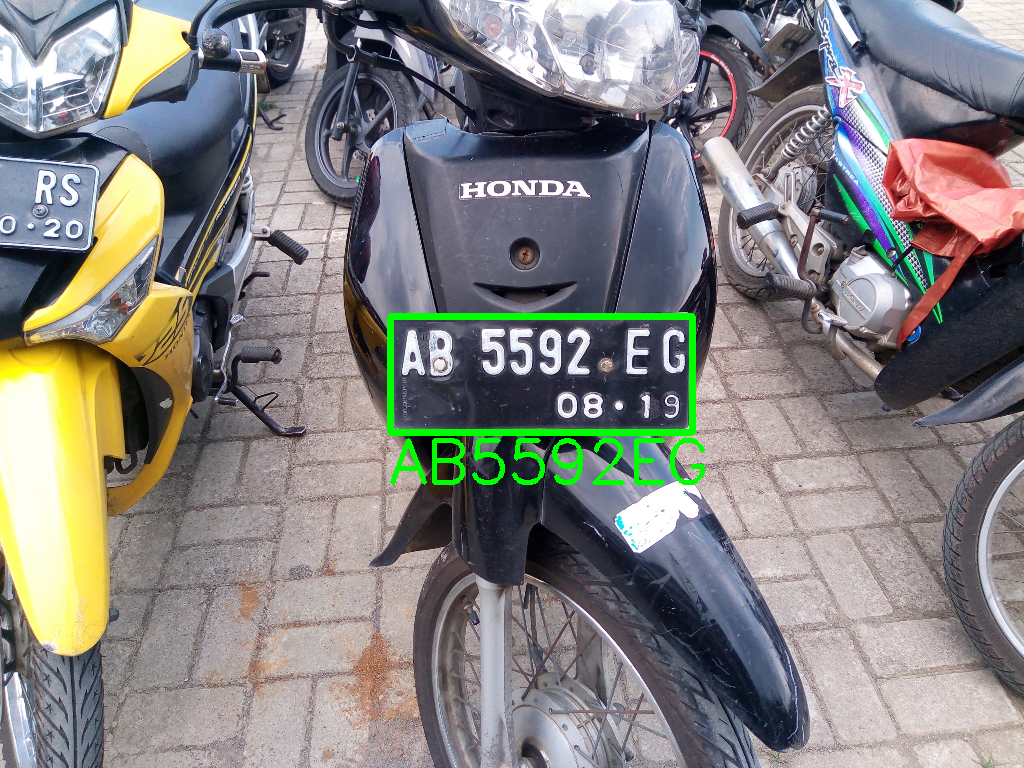

-1

In [ ]:
# tinggi dan lebar citra untuk test
img_height = 40 
img_width = 40

 # klas karakter
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

  # load model yang sudah terlatih
model = keras.models.load_model('my_model')

 # untuk menyimpan string karakter
num_plate = []

for char_sorted in index_chars_sorted:
      x,y,w,h = cv.boundingRect(contours_plate[char_sorted])

        # potong citra karakter
      char_crop = cv.cvtColor(img_plate_bw[y:y+h,x:x+w], cv.COLOR_GRAY2BGR)

        # resize citra karakternya
      char_crop = cv.resize(char_crop, (img_width, img_height))

        # preprocessing citra ke numpy array
      img_array = keras.preprocessing.image.img_to_array(char_crop)

        # agar shape menjadi [1, h, w, channels]
      img_array = tf.expand_dims(img_array, 0)

        # buat prediksi
      predictions = model.predict(img_array)
      score = tf.nn.softmax(predictions[0]) 

      num_plate.append(class_names[np.argmax(score)])
      print(class_names[np.argmax(score)], end='')

# Gabungkan string pada list
plate_number = ''
for a in num_plate:
  plate_number += a 

cv.putText(img_show_plate, plate_number,(x_plate, y_plate + h_plate + 50), cv.FONT_ITALIC, 2.0, (0,255,0), 3)
cv2_imshow(img_show_plate)
cv.waitKey(0)



